# Project EDA - Kelompok 7

### 1. Import Package yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import Data

In [2]:
data = pd.read_csv('Kelompok 7 Golden Globe Awards.csv')

In [3]:
data.head(5)

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


### 3. Deskripsi Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
year_film     7991 non-null int64
year_award    7991 non-null int64
ceremony      7991 non-null int64
category      7991 non-null object
nominee       7991 non-null object
film          6191 non-null object
win           7991 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


In [5]:
data.describe()

,year_film,year_award,ceremony
count,7991.000000,7991.000000,7991.000000
mean,1987.490552,1988.490552,45.490552
std,18.936258,18.936258,18.936258
min,1943.000000,1944.000000,1.000000
25%,1972.000000,1973.000000,30.000000
50%,1988.000000,1989.000000,46.000000
75%,2004.000000,2005.000000,62.000000
max,2019.000000,2020.000000,77.000000


In [6]:
data.isnull().sum()

year_film        0
year_award       0
ceremony         0
category         0
nominee          0
film          1800
win              0
dtype: int64

In [7]:
data.category.unique()

array(['Best Performance by an Actress in a Supporting Role in any Motion Picture',
       'Best Performance by an Actor in a Supporting Role in any Motion Picture',
       'Best Director - Motion Picture', 'Picture',
       'Actress In A Leading Role', 'Actor In A Leading Role',
       'Promoting International Understanding',
       'Special Achievement Award', 'Best Screenplay - Motion Picture',
       'Best Original Score - Motion Picture',
       'New Star Of The Year - Actress', 'New Star Of The Year - Actor',
       'Juvenile Performance', 'Cinematography',
       'Foreign Film - English Language',
       'Best Motion Picture - Foreign Language',
       'Outstanding Use Of Color',
       'Best Performance by an Actress in a Motion Picture - Drama',
       'Best Performance by an Actor in a Motion Picture - Drama',
       'Best Performance by an Actor in a Motion Picture - Musical or Comedy',
       'New Star Of The Year',
       'Actress In A Leading Role - Musical Or Comedy',
  

### 3a. Dataset yang terdapat Null Values

In [8]:
data_with_NaN = data[data.isnull().any(axis=1)]

In [9]:
pd.DataFrame(data_with_NaN).head(10)

,year_film,year_award,ceremony,category,nominee,film,win
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
9,1944,1945,2,Picture,Going My Way,NaN,True
16,1945,1946,3,Picture,The Lost Weekend,NaN,True
24,1946,1947,4,Picture,The Best Years Of Our Lives,NaN,True
35,1947,1948,5,Picture,Gentleman's Agreement,NaN,True
46,1948,1949,6,Picture,Johnny Belinda,NaN,True
47,1948,1949,6,Picture,The Treasure of the Sierra Madre,NaN,True
71,1949,1950,7,Outstanding Use Of Color,The Adventures of Ichabod and Mr. Toad,NaN,True
72,1949,1950,7,Outstanding Use Of Color,On The Town,NaN,False
73,1949,1950,7,Picture,All The King's Men,NaN,True


In [10]:
data_with_NaN['category'].unique()

array(['Picture', 'Outstanding Use Of Color',
       'Henrietta Award (World Film Favorites)',
       'Best Motion Picture - Drama',
       'Best Motion Picture - Musical or Comedy',
       'Henrietta Award (World Film Favorite)', 'Cecil B. deMille Award',
       'Documentary', 'Hollywood Citizenship Award',
       'Television Achievement', 'Special Achievement Award',
       'New Foreign Star Of The Year - Actress',
       'New Foreign Star Of The Year - Actor',
       'New Star Of The Year - Actress', 'Picture - Musical',
       'Picture - Comedy', 'Famous Silent Filmstars', 'Television Series',
       'Actor In A Television Series', 'Actress In A Television Series',
       'Best Television Series - Drama', 'Television Program',
       'Television Series - Comedy', 'International News Coverage',
       'Television Series - Variety',
       'Best Television Series - Musical or Comedy', 'Television Movie',
       'Television Special - Variety Or Musical',
       'Best Television Limite

In [11]:
category_with_NaN = data_with_NaN.category.value_counts().reset_index()
category_with_NaN.columns = ['category', 'nomination'] 
category_with_NaN.head(10)

,category,nomination
0,Best Motion Picture - Drama,351
1,Best Motion Picture - Musical or Comedy,306
2,Best Television Series - Drama,269
3,Best Television Series - Musical or Comedy,263
4,Best Television Limited Series or Motion Pictu...,198
5,Cecil B. deMille Award,68
6,Henrietta Award (World Film Favorites),64
7,Best Motion Picture - Animated,62
8,Television Movie,43
9,Documentary,28


In [12]:
data_clean = data.replace(np.nan, 'non film', regex=True)

In [13]:
data_clean.isnull().sum()

year_film     0
year_award    0
ceremony      0
category      0
nominee       0
film          0
win           0
dtype: int64

### 3b. Dataset yang hanya berisi pemenang saja

In [14]:
data_win = data_clean.loc[data_clean.win==True]
data_win.sample(10)

,year_film,year_award,ceremony,category,nominee,film,win
2042,1973,1974,31,Best Motion Picture - Musical or Comedy,American Graffiti,non film,True
4342,1991,1992,49,Best Performance by an Actress in a Motion Pic...,Jodie Foster,"Silence of the Lambs, The",True
1527,1969,1970,27,Best Performance by an Actor in a Motion Pictu...,John Wayne,True Grit,True
5066,1996,1997,54,Best Performance by an Actor in a Television S...,John Lithgow,3rd Rock From The Sun,True
7611,2017,2018,75,Best Motion Picture - Drama,"Three Billboards Outside Ebbing, Missouri",non film,True
307,1955,1956,13,Hollywood Citizenship Award,Esther Williams,non film,True
4409,1991,1992,49,Best Television Limited Series or Motion Pictu...,One Against The Wind,non film,True
2392,1975,1976,33,Best Performance by an Actor in a Supporting R...,Tim Conway,"Carol Burnett Show, The",True
6433,2007,2008,65,Best Performance by an Actress in a Limited Se...,Queen Latifah,Life Support,True
5369,1999,2000,57,Best Performance by an Actor in a Supporting R...,Tom Cruise,Magnolia,True


### 4. Tren Nominasi

Text(0, 0.5, 'Nominations')

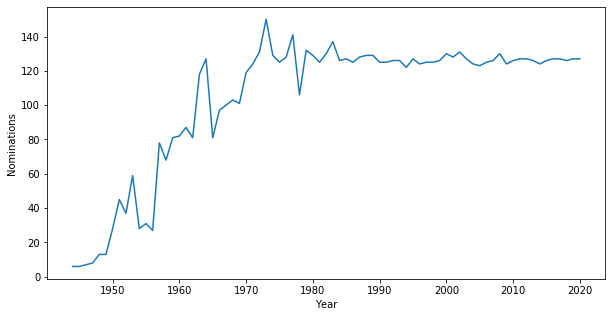

In [15]:
plt.figure(figsize=(10,5))
df = data_clean['year_award'].value_counts()
sns.lineplot(x=df.index, y=df.values)
plt.xticks()
plt.yticks()
plt.xlabel("Year")
plt.ylabel("Nominations")

### 5. Visualisasi Nominasi Kategori Teratas

In [16]:
Top_Category = data_clean.category.value_counts().reset_index()
Top_Category.head(10)

,index,category
0,Best Performance by an Actress in a Supporting...,360
1,Best Director - Motion Picture,357
2,Best Performance by an Actor in a Supporting R...,352
3,Best Motion Picture - Drama,351
4,Best Performance by an Actor in a Motion Pictu...,344
5,Best Performance by an Actress in a Motion Pic...,342
6,Best Performance by an Actor in a Motion Pictu...,342
7,Best Original Score - Motion Picture,320
8,Best Motion Picture - Musical or Comedy,306
9,Best Screenplay - Motion Picture,293


Text(0, 0.5, 'Category')

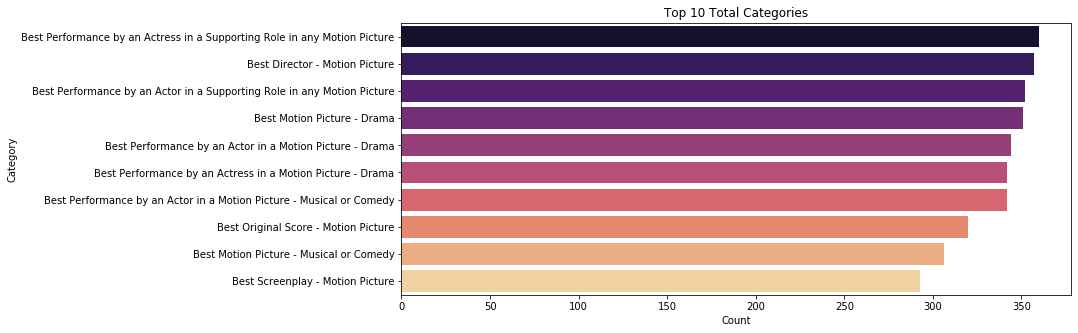

In [17]:
Top_10_Categories=Top_Category.head(10)
plt.figure(figsize=(12,5))
plt.title('Top 10 Total Categories')
sns.barplot(y='index',x='category', data=Top_10_Categories, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Category')

### 6. Visualisasi Nama Nominasi Teratas

In [18]:
Top_Nominee = data_clean.nominee.value_counts().reset_index()
Top_Nominee.head(10)

,index,nominee
0,Meryl Streep,33
1,Jack Lemmon,23
2,John Williams,23
3,Shirley MacLaine,21
4,Al Pacino,19
5,Jack Nicholson,18
6,Carol Burnett,17
7,Barbra Streisand,16
8,Paul Newman,16
9,Helen Mirren,16


Text(0, 0.5, 'Nominee')

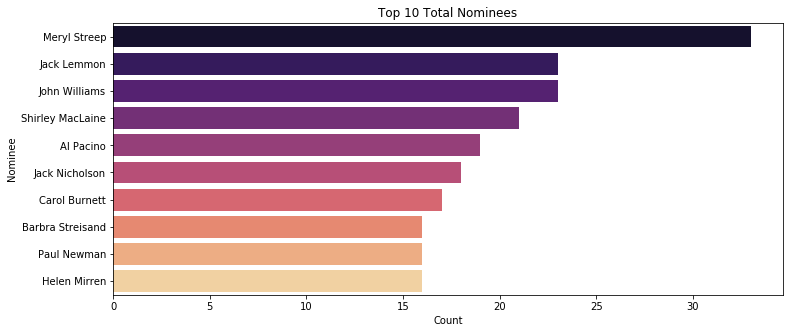

In [19]:
Top_10_Nominees=Top_Nominee.head(10)
plt.figure(figsize=(12,5))
plt.title('Top 10 Total Nominees')
sns.barplot(y='index',x='nominee', data=Top_10_Nominees, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Nominee')

### 7. Visualisasi Nama Pemenang Terbanyak

In [20]:
TopWinners=data_win.nominee.value_counts().reset_index()
TopWinners.columns = ['name', 'nomination']
TopWinners.head(10)

,name,nomination
0,Meryl Streep,8
1,Barbra Streisand,7
2,Jane Fonda,7
3,Alan Alda,6
4,Jack Nicholson,6
5,Angela Lansbury,6
6,Paul Newman,6
7,Laura Dern,5
8,Dustin Hoffman,5
9,Robert Redford,5


Text(0, 0.5, 'Nominee')

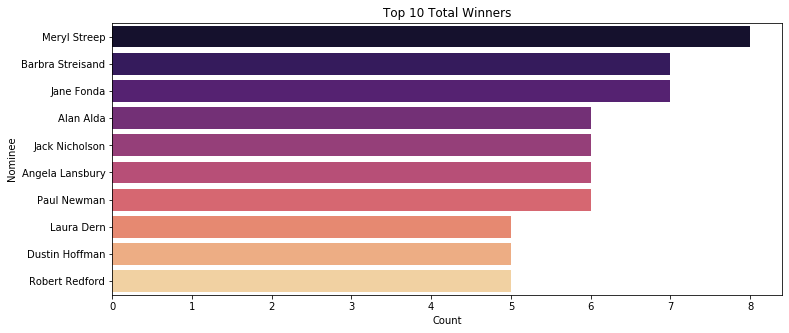

In [21]:
Top_10_Winners=TopWinners.head(10)
plt.figure(figsize=(12,5))
plt.title('Top 10 Total Winners')
sns.barplot(y='name',x='nomination', data=Top_10_Winners, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Nominee')

### 8. Visualisasi Film Pemenang Terbanyak

In [22]:
TopWinners=data_win.nominee.value_counts().reset_index()
TopWinners.columns = ['name', 'nomination']
TopWinners.head(10)

,name,nomination
0,Meryl Streep,8
1,Barbra Streisand,7
2,Jane Fonda,7
3,Alan Alda,6
4,Jack Nicholson,6
5,Angela Lansbury,6
6,Paul Newman,6
7,Laura Dern,5
8,Dustin Hoffman,5
9,Robert Redford,5


In [23]:
nominee_film=data_clean['film'].value_counts().reset_index()
nominee_film.columns =['film', 'nomination'] 
nominee_film.head(10)

,film,nomination
0,non film,1800
1,L.A. Law,26
2,All In The Family,23
3,Will & Grace,23
4,Cheers,22
5,Taxi,20
6,"Carol Burnett Show, The",19
7,Dynasty (1981-1989),19
8,Sex and The City,18
9,"Sopranos, The",18


In [24]:
nominee_film = nominee_film[nominee_film.film != 'non film'].head(10).reset_index(drop=True)
nominee_film

,film,nomination
0,L.A. Law,26
1,All In The Family,23
2,Will & Grace,23
3,Cheers,22
4,Taxi,20
5,"Carol Burnett Show, The",19
6,Dynasty (1981-1989),19
7,Sex and The City,18
8,"Sopranos, The",18
9,ER,18


Text(0, 0.5, 'Film')

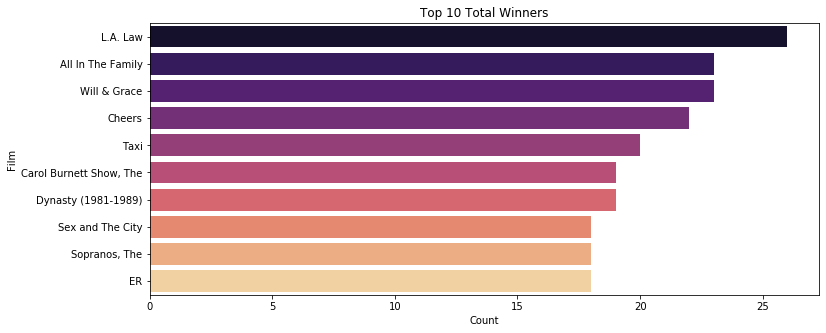

In [25]:
plt.figure(figsize=(12,5))
plt.title('Top 10 Total Winners')
sns.barplot(y='film',x='nomination', data=nominee_film, palette = 'magma')
plt.xlabel('Count')
plt.ylabel('Film')

### 9. Persentase Kemenangan Teratas Tiap Nominasi (minimal 15 kali masuk nominasi)

In [26]:
total_nominee = data_clean.nominee.value_counts().reset_index()
total_winner = data_win.nominee.value_counts().reset_index()
wr = total_nominee.merge(total_winner, how = 'inner', on = 'index')
wr.columns = ['Name', 'Total_Nominees', 'Total_Winners']

In [27]:
wr = wr.sort_values(by='Total_Nominees', ascending=False).head(10)
wr['Win_Rate(%)'] = round((wr['Total_Winners'] / wr['Total_Nominees'])*100, 2)

In [28]:
wr[wr['Total_Nominees'] >= 15].sort_values(by='Win_Rate(%)', ascending=False).reset_index(drop=True)

,Name,Total_Nominees,Total_Winners,Win_Rate(%)
0,Barbra Streisand,16,7,43.75
1,Paul Newman,16,6,37.50
2,Jack Nicholson,18,6,33.33
3,Carol Burnett,17,5,29.41
4,Meryl Streep,33,8,24.24
5,Shirley MacLaine,21,5,23.81
6,Al Pacino,19,4,21.05
7,Helen Mirren,16,3,18.75
8,Jack Lemmon,23,4,17.39
9,John Williams,23,4,17.39


# Terima Kasih